In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv('data.csv')

In [14]:
df.shape

(12, 2)


# Q1

In [4]:
X = df['experience']
y = df['salary']

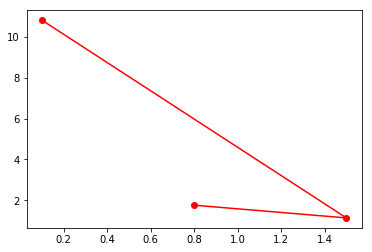

In [5]:
b0 = 1.1
b1 = [0.1, 1.5, 0.8]
MSE = []
for k in (b1):
    y_pred = b0 + k * X
    error = y_pred -y
    mse = sum(error**2)/len(df)
    MSE.append(mse)
plt.plot(b1, MSE, marker = 'o', color = 'red')

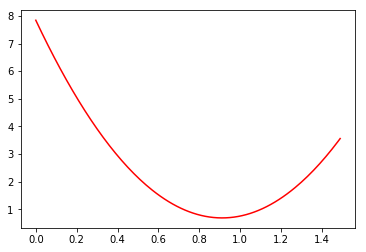

In [6]:
MSE1=[]
# b1 = [x/100 for x in range(150)]
b1 = np.arange(150)/100

for i in b1:
    y_pred = 2 + i* X
    error = y_pred -y
    mse = sum(error**2)/len(df)
    MSE1.append(mse)
plt.plot(b1,MSE1, color = 'red')

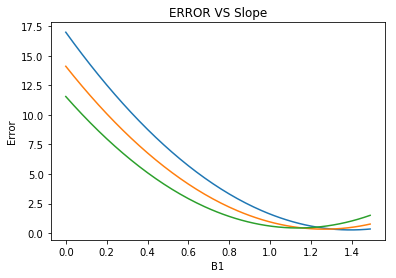

In [7]:
MSE2=[]
# b1 = [x/100 for x in range(150)]
b0 = [.5,.9,1.3]
b1 = np.arange(150)/100
for k in b0:
    MSE2.clear()
    for i in b1:
        y_pred = k + i* X
        error = y_pred -y
        mse = sum(error**2)/len(df)
        MSE2.append(mse)
    
    plt.plot(b1, MSE2)
    plt.xlabel('B1')
    plt.ylabel('Error')
    plt.title("ERROR VS Slope")

In [8]:
X = np.array(X)
y = np.array(y)
lr = LinearRegression()
lr.fit(X.reshape(-1,1),y)
pred = lr.predict(X.reshape(-1,1))
print(mean_squared_error(y,pred))

0.23366710810280555


# Q2


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

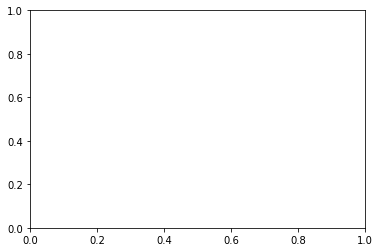

In [20]:
X = df['experience']
y = df['salary']


def initi():
    b = 0
    w = 1
    return b, w


def forward(X, b, w):
    z = b + w * X
    return z


def error(y,z):
    delta = z - y
    return delta


def update_param(b, w, z, learning_rate, delta, X):
    
    b = b - learning_rate * np.mean(delta)
    w = w - learning_rate * np.mean(delta * X)
    return b, w


def gradient_des(X, y, learning_rate, epochs):
    b, w = initi()
    l1 = []
    for j in range(epochs):
        for i in range(60):
            z = forward(X, b, w)
            delta = error(y, z)
            b, w = update_param(b, w, z, learning_rate, delta, X)
    #         b = b - learning_rate * np.mean(delta)  # Update intercept
    #         w = w - learning_rate * np.mean(delta * X)  # Update slope

    #         if i % 10 == 0:
            loss = np.sum(delta ** 2)/len(df)
    #             loss = np.sqrt(loss)
#             print(f"Iteration {i+1}/{epochs}, Loss: {loss}")
            l1.append(loss)
        print(f"Epoch {j+1}, loss = {loss}")
    return b, w, l1


b,w,l1 = gradient_des(X, y, 0.2, 5)

ValueError: x and y must have same first dimension, but have shapes (12,) and (60,)

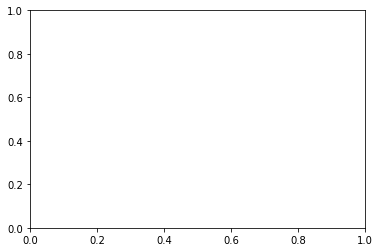

In [33]:
print(b,w)

0.023151618767443795 1.5488462227742934


In [34]:
print(l1[60]/12)

0.23406733149978218


In [49]:
X = np.array(X)
y = np.array(y)
sgd = SGDRegressor(alpha = 0.2, max_iter=60)
sgd.fit(X.reshape(-1,1), y)
pred2 = sgd.predict(X.reshape(-1,1))
print(mean_squared_error(y, pred2))

0.27164114840646286
